<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/pca_sandbox2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import plotly.express as px
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [28]:
!pip install pyforest

In [29]:
import pyforest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [30]:
from sklearn import datasets

In [31]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type'] = iris.target


In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
type_dict = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2]
}

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
df['name'] = [type_dict[x] for x in df.type]

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [37]:
df.groupby(df.name).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


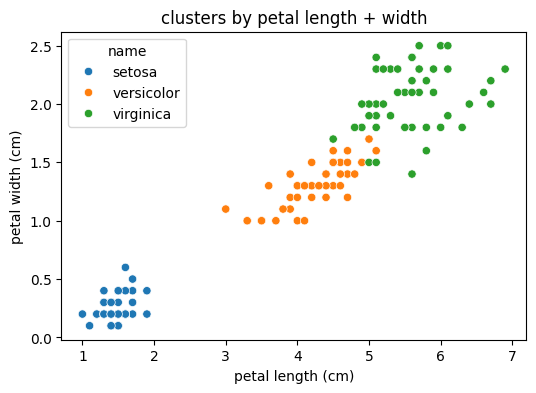

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df,x=df['petal length (cm)'], y=df['petal width (cm)'], hue = df['name'], ax=ax)
plt.title('clusters by petal length + width')
plt.show()

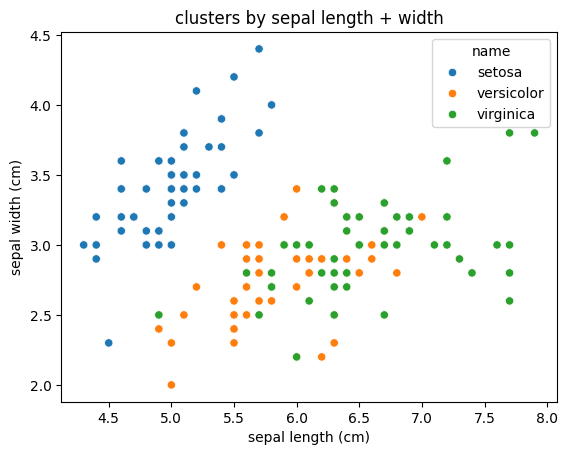

In [39]:
sns.scatterplot(data=df,x=df['sepal length (cm)'], y= df['sepal width (cm)'], hue = df['name'])
plt.title('clusters by sepal length + width')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
x = df.drop(['type', 'name'], axis=1).values

In [41]:
df[['petal length (cm)', 'petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [42]:
x_scale = StandardScaler().fit_transform(x)

In [43]:
pd.DataFrame(x_scale, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale)
pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

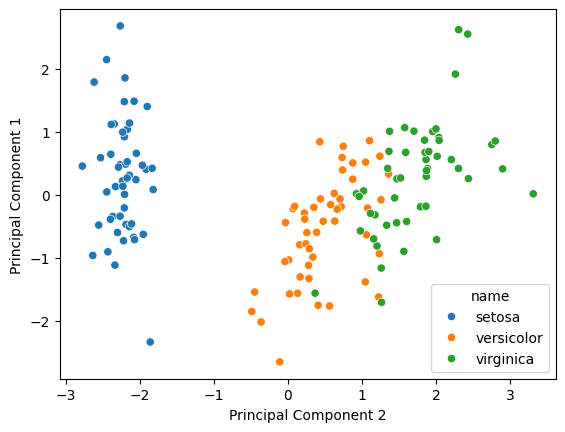

In [45]:
sns.scatterplot(data = df, x=pca2_df.pca1, y=pca2_df.pca2, hue = df.name)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()

In [46]:
pcasolo = PCA(n_components = 1)
solopca_vals = pcasolo.fit_transform(x_scale)
zeros = [0 for i in range(150)]


In [47]:
solo_components = []
for i in solopca_vals:
    solo_components.append(i[0])

In [48]:
pca3_df = pd.DataFrame(data = solopca_vals, columns = ['pca1'])

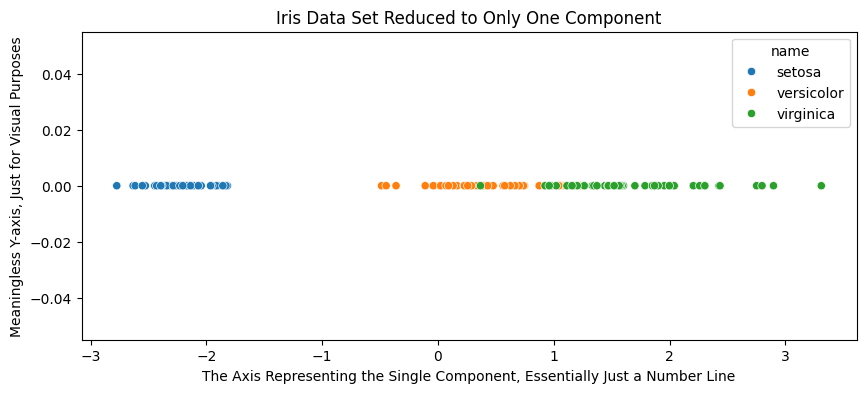

In [49]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = pca3_df, x= 'pca1', y= zeros, hue=df.name)
plt.title('Iris Data Set Reduced to Only One Component')
plt.ylabel('Meaningless Y-axis, Just for Visual Purposes')
plt.xlabel('The Axis Representing the Single Component, Essentially Just a Number Line')
plt.show()

In [50]:
df_solo = pd.DataFrame(data=solo_components, columns=['pca1'])

In [51]:
df_solo.head()

,pca1
0,-2.264703
1,-2.080961
2,-2.364229
3,-2.299384
4,-2.389842
